In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [3]:
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (16, 4), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

In [4]:
def plot_ecdfs(filepath, savepath='', min_degree=2, max_degree=7, x_min=0, x_max=1, label_columns=6):
    with open(filepath, 'rb') as handle:
        results = pickle.load(handle)
    fig, axs = plt.subplots(2, 2, figsize=(8.5,5))

    step_size = 10 # to accelerate plot generation
    indices = [(0,0), (0,1), (1,0), (1,1)]

    for idx, (dataset, power_2_pad, dataset_results) in enumerate(results):
        for degree, differences in dataset_results:
            if degree < min_degree or degree > max_degree:
                continue
            n = np.arange(1,len(differences[::step_size])+1) / np.float(len(differences) / step_size)
            axs[indices[idx]].step(differences[::step_size], n, label='p={}'.format(degree), linewidth=2)
            axs[indices[idx]].set_title('{}, d={}'.format(dataset[0], power_2_pad))
            if indices[idx][1] == 0:
                axs[indices[idx]].set_ylabel('ECDF')
            if x_max > 1:
                axs[indices[idx]].vlines(x=1.0, ymin=0, ymax=1.0, colors='black', label='', linestyles='dashed')
            #axs[idx].hlines(y=0.5, xmin=0, xmax=2.0, colors='black', label='', linestyles='dashed')

            if indices[idx][1] > 0:
                axs[indices[idx]].set_yticks([])
            if indices[idx][0] == 1:
                ticks = np.arange(0, x_max+0.5, 0.5)
                axs[indices[idx]].set_xticks(ticks)
                #axs[indices[idx]].set_xticklabels(['0', '0.5', '1'])
                axs[indices[idx]].set_xlabel('Variance ratio')
            else:
                axs[indices[idx]].set_xticks([])
                axs[indices[idx]].set_xticklabels([])
                
            axs[indices[idx]].set_xlim(x_min, x_max)
            #axs[idx].legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))


    handles, labels = axs[indices[0]].get_legend_handles_labels()
    plt.tight_layout()

    legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=label_columns, bbox_to_anchor = (0,0.3,1.01,0.85), bbox_transform=plt.gcf().transFigure)
    if len(savepath) > 0:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

## TensorSRHT

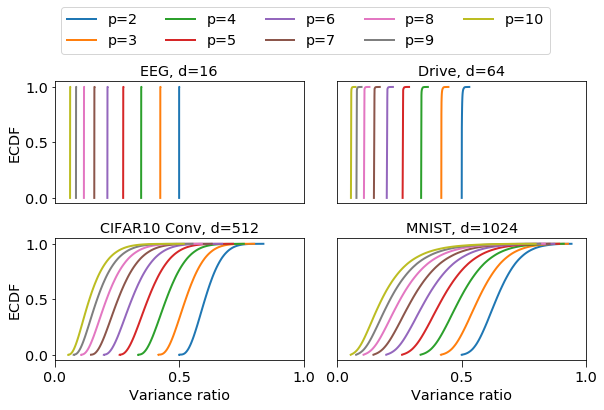

In [70]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_r_norm.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_norm.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=5
)

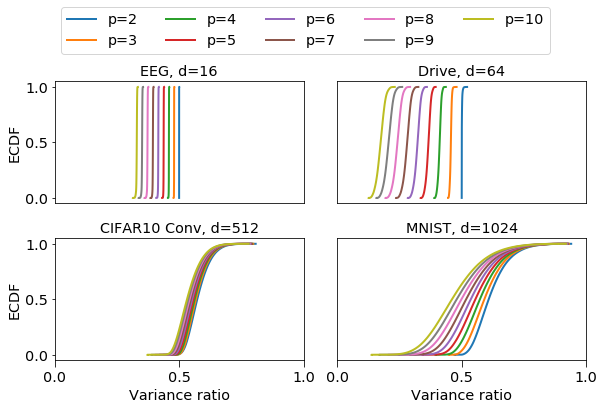

In [71]:
# train data
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_r_minmax.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_minmax.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=5
)

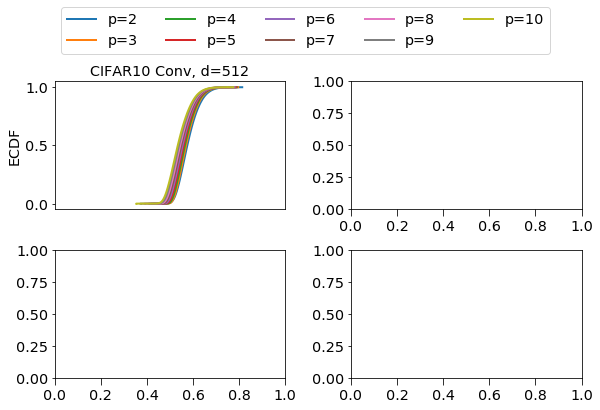

In [7]:
# test data

plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_r_minmax_test.pkl',
    '../figures/comp_tensor_srht_real_tensor_srht_minmax_test.pdf',
    min_degree=2,
    max_degree=10,
    label_columns=5
)

## CtR TensorSRHT vs. TensorSketch

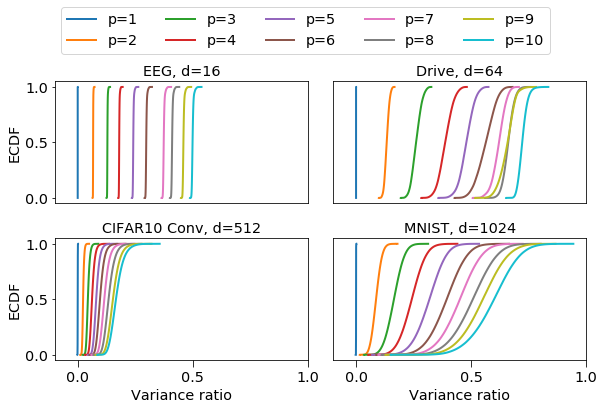

In [75]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_minmax.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_minmax.pdf',
    min_degree=1,
    max_degree=10,
    label_columns=5,
    x_min = -0.1
)

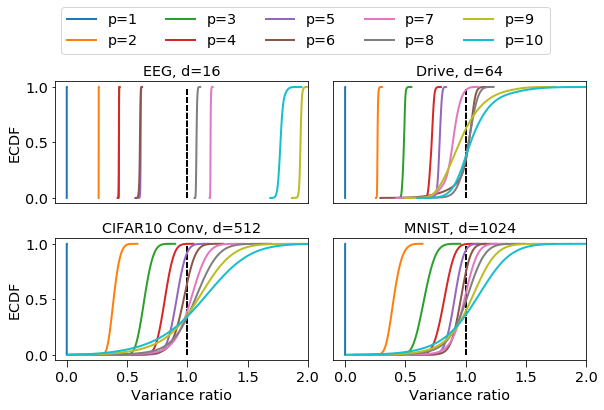

In [73]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_norm.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_norm.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=5
)

## R TensorSRHT vs. TensorSketch

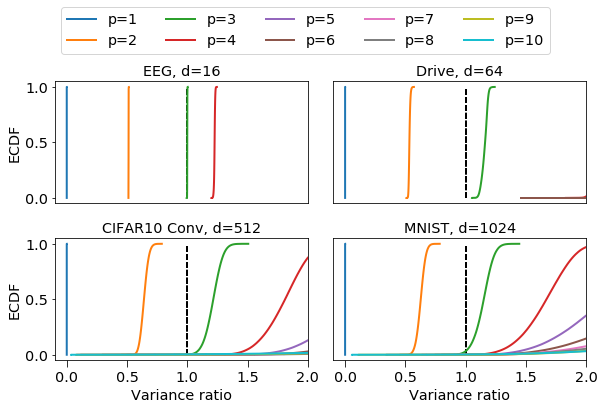

In [74]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_norm.pkl',
    '../figures/real_tensor_srht_tensor_sketch_norm.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=5
)

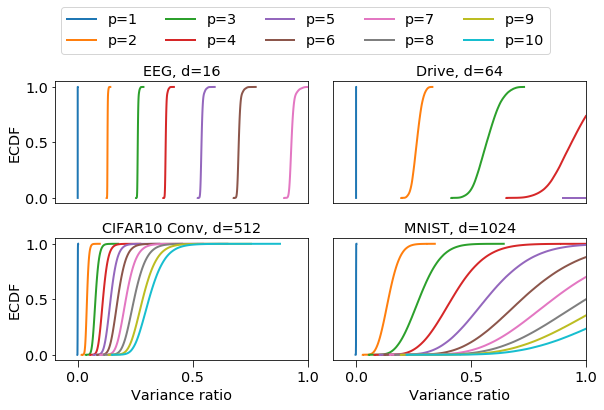

In [8]:
# on train data
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_minmax.pkl',
    '../figures/real_tensor_srht_tensor_sketch_minmax.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 1,
    label_columns=5
)

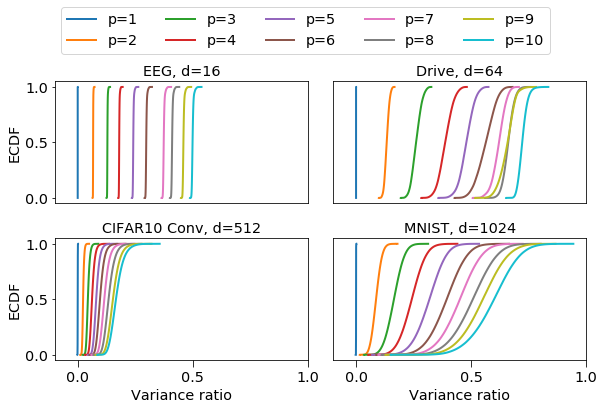

In [9]:
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_ctr_tensorsketch_r_minmax.pkl',
    '../figures/comp_tensor_srht_tensor_sketch_minmax.pdf',
    min_degree=1,
    max_degree=10,
    label_columns=5,
    x_min = -0.1
)

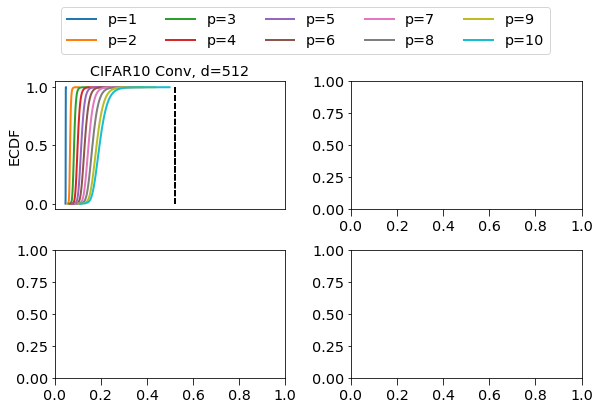

In [5]:
# on test data
plot_ecdfs(
    '../saved_models/ecdf_plots/tensorsrht_r_tensorsketch_r_minmax_test.pkl',
    '../figures/real_tensor_srht_tensor_sketch_minmax_test.pdf',
    min_degree=1,
    max_degree=10,
    x_min = -0.1,
    x_max = 2,
    label_columns=5
)